In [1]:
# Import essential libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data into a dataframe, and create a copy dataframe

df_main = pd.read_csv('MR data - Compiled Data Set.csv')
df_crime = df_main.copy()

In [3]:
df_crime.tail(3)

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
463,Lucknow,"Lucknow: Stalker thrashes dad, girl poisons he...",LUCKNOW: A 17-year-old girl consumed poison at...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,8",NaN,1.0
464,Lucknow,Uttar Pradesh: Woman accuses boss of harassment,LUCKNOW: A 30-year-old employee of a real esta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,NaN
465,Lucknow,Buyer knifes fish vendor to death over Rs 10 i...,LUCKNOW: A customer knifed a fish vendor to de...,Petty Quarrels,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_crime = df_crime.drop(labels=['Title', 'Text'], axis=1)



In [5]:
df_crime.columns

Index(['City ',
       'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other',
       'Number of child victims', 'Number of male victims(adult)',
       'Number of female victims(adult)',
       'Kidnnaping:\nNumber of child victims', 'Number of male(adult) ',
       'Number of female(adult)',
       'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act',
       'Number of adult victims', 'Number of childs invoved'],
      dtype='object')

In [6]:
df_crime.columns = ['City', 'Murder Reason', 'Child Victims', 'Adult Male Victims', 'Adult Female Victims', 'Kidnapped Child', 'Involved Adult Male', 'Involved Adult Female', 'Crime Against Women(Act)', 'Adult Victims', 'Children Involved']

In [7]:
df_crime.isnull().sum()

City                          0
Murder Reason               319
Child Victims               453
Adult Male Victims          371
Adult Female Victims        419
Kidnapped Child             455
Involved Adult Male         458
Involved Adult Female       463
Crime Against Women(Act)    266
Adult Victims               350
Children Involved           381
dtype: int64

In [8]:
df_crime = df_crime.fillna(0)

In [9]:
df_crime.head(5)

,City,Murder Reason,Child Victims,Adult Male Victims,Adult Female Victims,Kidnapped Child,Involved Adult Male,Involved Adult Female,Crime Against Women(Act),Adult Victims,Children Involved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


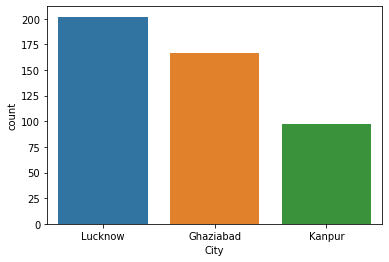

In [10]:
sns.countplot(data=df_crime, x='City', order=df_crime['City'].value_counts().index);

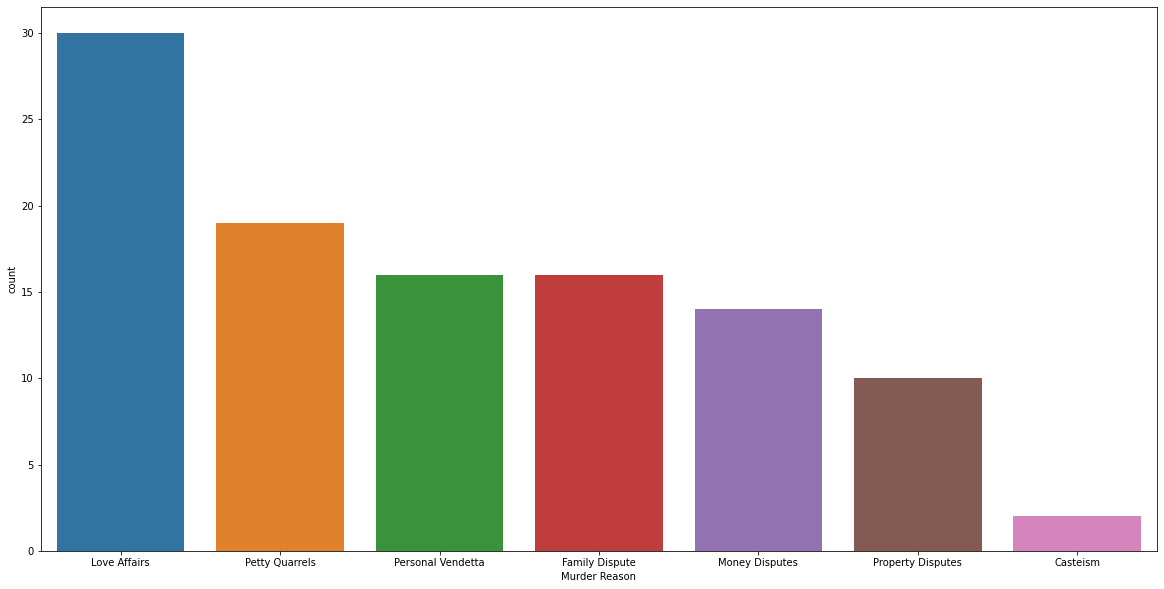

In [11]:
df_murder_reasons = df_crime[df_crime['Murder Reason'].isin([0, 'Unknown reasons']) == False]

plt.figure(figsize=(20,10))
sns.countplot(data=df_murder_reasons, x='Murder Reason', order=df_murder_reasons['Murder Reason'].value_counts().index);

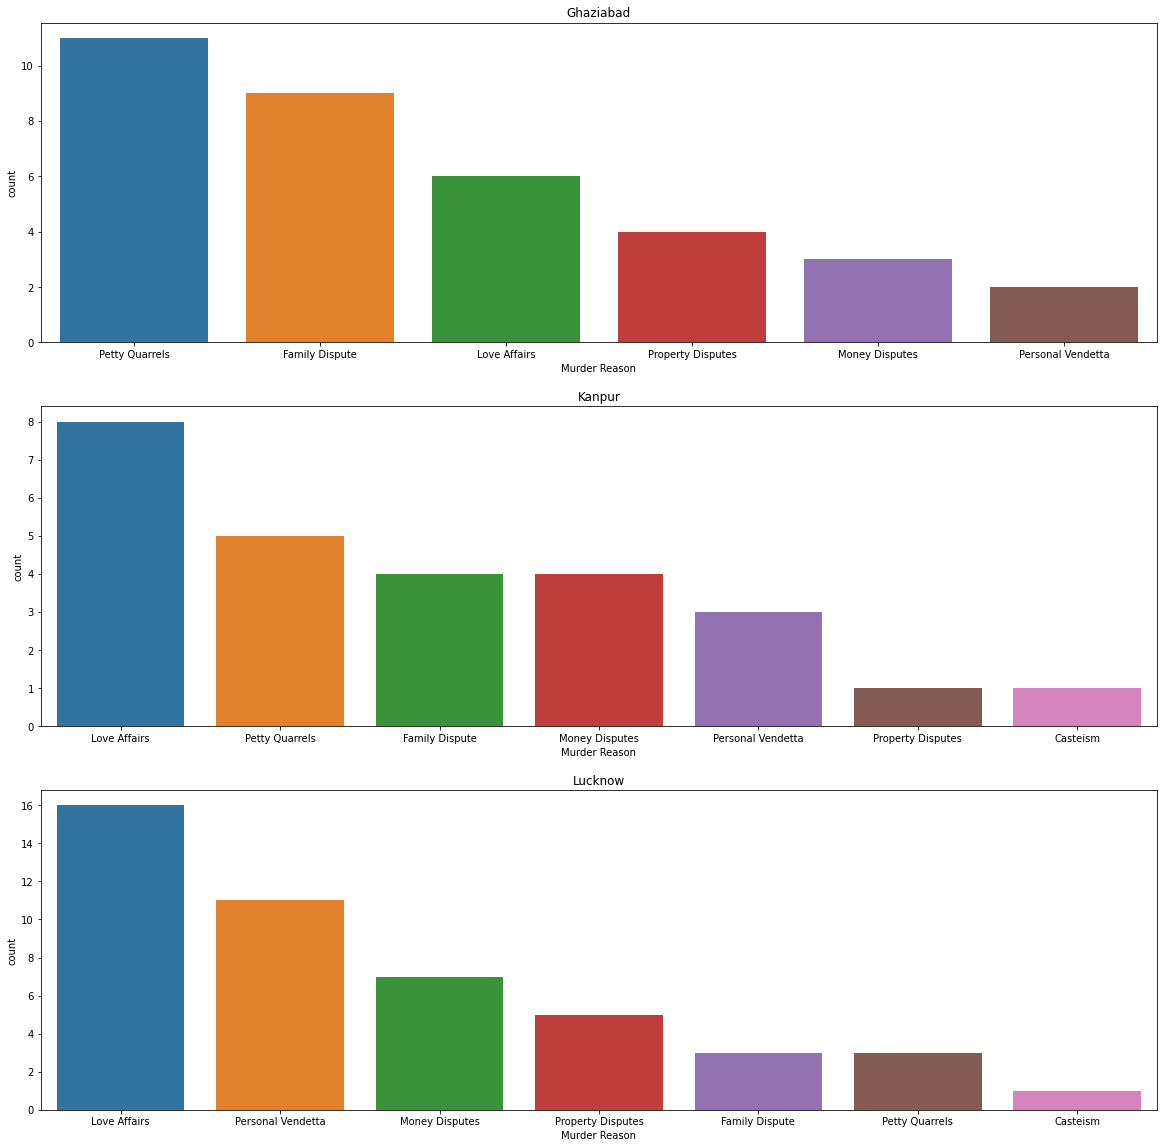

In [12]:
fig, axes = plt.subplots( len(df_murder_reasons['City'].unique()), 1, figsize=(20,20))
i = 0
for ct in df_murder_reasons['City'].unique():
    sns.countplot(data=df_murder_reasons[df_murder_reasons['City'] == ct], x='Murder Reason', order=df_murder_reasons[df_murder_reasons['City'] == ct]['Murder Reason'].value_counts().index, ax = axes[i]).set(title=ct);
    i+=1

In [13]:
idx = 0
for idx in range(0,11):
    df_crime.insert(8 + idx, column = 'Act' + str(idx + 1), value = 0)
    idx +=1
    

In [14]:
for i in range(len(df_crime['Crime Against Women(Act)'])):
    splitted = str(df_crime['Crime Against Women(Act)'][i]).split(',')
    for x in splitted:
        if x=='0':
            continue
        df_crime.loc[int(i),'Act{}'.format(x.strip())]=1

In [22]:
df_crime[df_crime['Murder Reason'] != 0].head(5)

,City,Murder Reason,Child Victims,Adult Male Victims,Adult Female Victims,Kidnapped Child,Involved Adult Male,Involved Adult Female,Act1,Act2,...,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Crime Against Women(Act),Adult Victims,Children Involved
10,Ghaziabad,Money Disputes,1.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
11,Ghaziabad,Love Affairs,0.0,0.0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
20,Ghaziabad,Unknown reasons,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
34,Ghaziabad,Unknown reasons,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
42,Ghaziabad,Love Affairs,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [16]:
df_crime_norm = df_crime.drop('Crime Against Women(Act)', axis = 1)

In [17]:
df_crime_norm.groupby(by='City')\
.agg({'Child Victims':'sum', 'Adult Male Victims':'sum', 'Adult Female Victims':'sum', 'Kidnapped Child':'sum'\
     , 'Adult Victims':'sum', 'Children Involved':'sum'})

,Child Victims,Adult Male Victims,Adult Female Victims,Kidnapped Child,Adult Victims,Children Involved
City,,,,,,
Ghaziabad,8.0,31.0,13.0,8.0,44.0,32.0
Kanpur,8.0,24.0,15.0,0.0,23.0,30.0
Lucknow,3.0,48.0,24.0,5.0,56.0,32.0


In [18]:
df_violence_against_women = df_crime_norm.iloc[:,8:19].sum().sort_values(ascending = False)

In [19]:
df_violence_against_women.index = ['Murder with Rape', 'Dowry Deaths(Sec. 3048)', 'Suicide(sec 305/306)', 'Kidnapping(All)', 'Acid Attack(Sec. 326A IPC)', 'Cruelty by Husband/in-laws((Sec.498 A IPC)', 'Rape only(Sec. 376 or 511 IPC)', 'Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)', 'Cyber Crimes against Women', 'Protection of Children from Sexual Offences Act', 'Unknown']

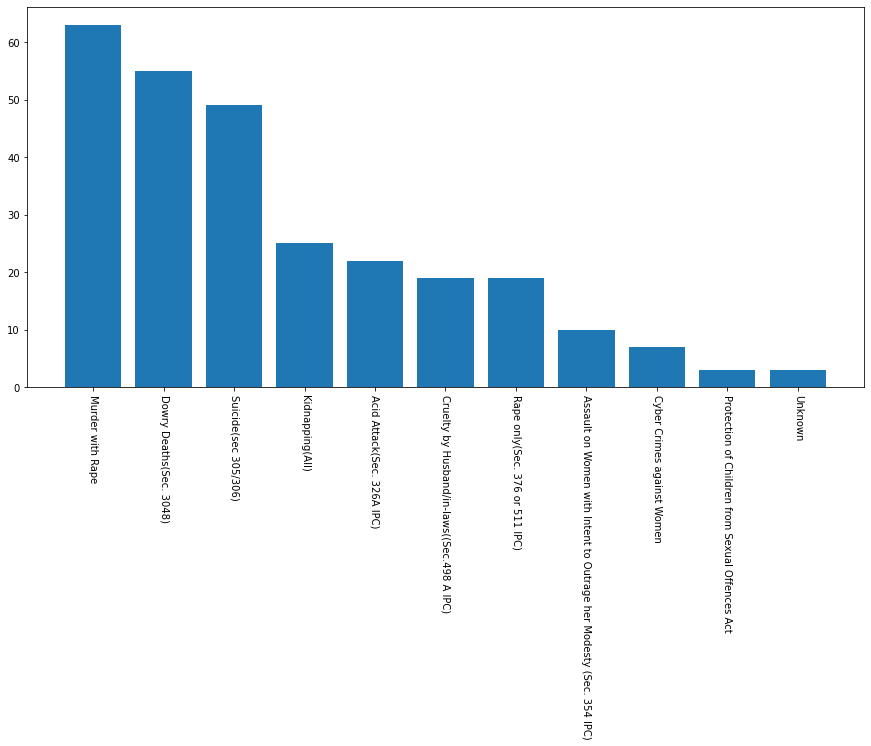

In [20]:
plt.figure(figsize = (15,7))
plt.bar(df_violence_against_women.index, df_violence_against_women.values)
plt.xticks(rotation = -90);

<Figure size 1080x720 with 0 Axes>

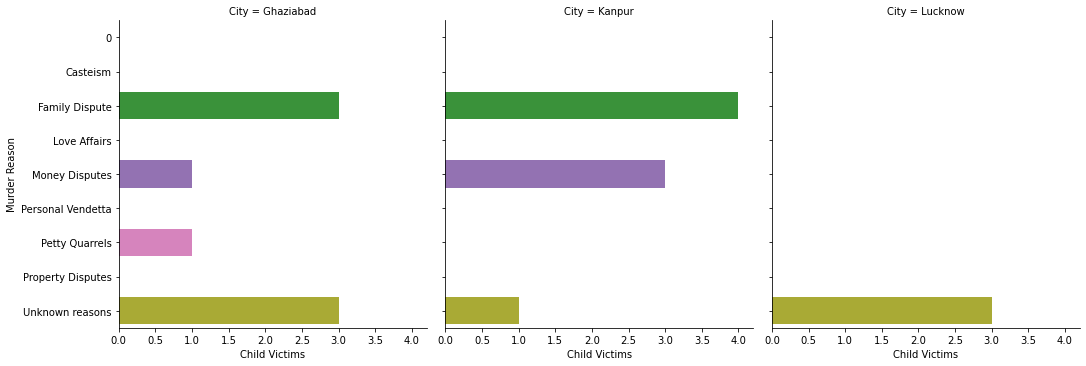

In [44]:
plt.figure(figsize = (15, 10))
df_crime_child_reason = df_crime_norm.groupby(['Murder Reason', 'City']).agg({'Child Victims':'sum'}).reset_index()
sns.catplot(data = df_crime_child_reason, y='Murder Reason', x='Child Victims', col = 'City', kind='bar', orient='h');


<Figure size 1080x720 with 0 Axes>

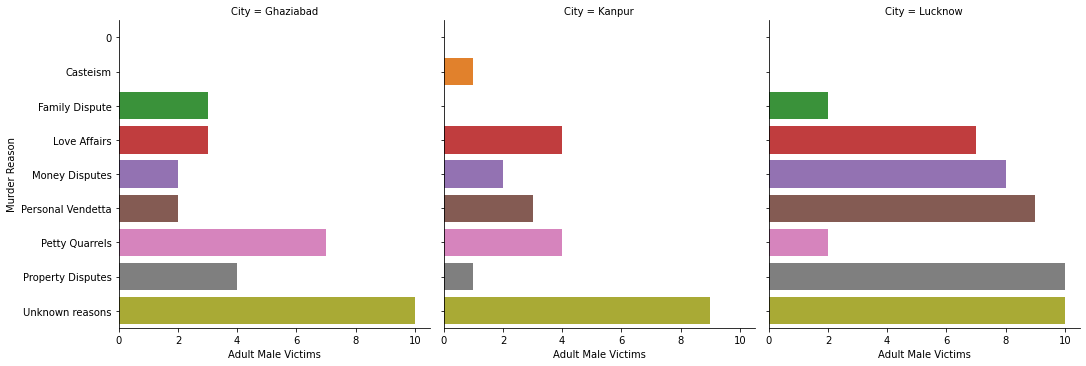

In [46]:
plt.figure(figsize = (15, 10))
df_crime_male_reason = df_crime_norm.groupby(['Murder Reason', 'City']).agg({'Adult Male Victims':'sum'}).reset_index()
sns.catplot(data = df_crime_male_reason, y='Murder Reason', x='Adult Male Victims', col = 'City', kind='bar', orient='h');


<Figure size 1080x720 with 0 Axes>

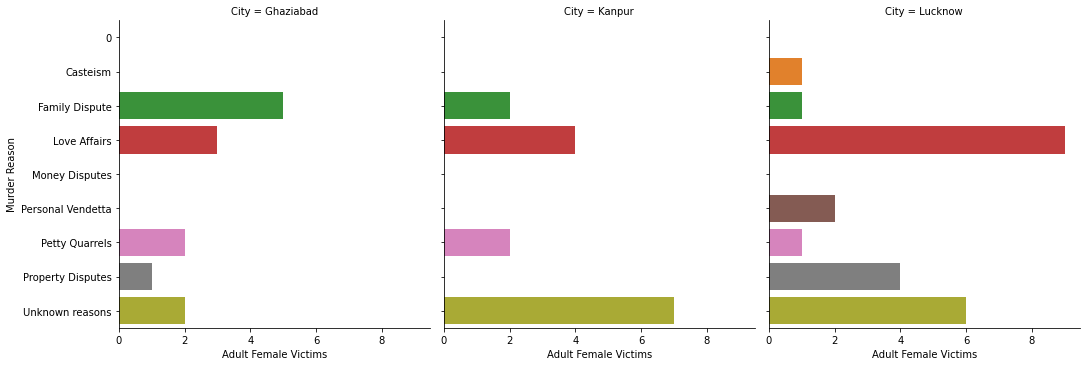

In [62]:
plt.figure(figsize = (15, 10))
df_crime_female_reason = df_crime_norm.groupby(['Murder Reason', 'City']).agg({'Adult Female Victims':'sum'}).reset_index()

sns.catplot(data = df_crime_female_reason, y='Murder Reason', x='Adult Female Victims', col = 'City', kind='bar', orient='h');
